# Market Trend Classification Model

## Overview
The Market Trend Classification Model aims to identify different market conditions (regimes) in historical stock price data using clustering techniques. By classifying these regimes, the project provides insights into periods of market behavior, such as bull, bear, or neutral phases, helping investors or financial analysts understand market trends and develop effective strategies.


# Requirements

In [1]:
pip install pandas numpy matplotlib scikit-learn yfinance


Note: you may need to restart the kernel to use updated packages.


## Steps Involved
### 1: **Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


### 2. **Data Collection**
Historical stock price data is collected using Yahoo Finance (via the `yfinance` library). In this example, the data of the S&P 500 index is fetched to observe trends and detect market regimes over time.


In [3]:
# Download historical stock data for a selected stock (e.g., S&P 500: ^GSPC)
stock_data = yf.download('^GSPC', start='2010-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


### 3. **Data Preprocessing**
- **Daily Returns**: Calculate the daily percentage change in stock prices to observe the day-to-day performance.
- **Feature Engineering**: Compute additional features such as moving averages (50-day and 200-day) and volatility (standard deviation of returns) to capture market behavior over time.
- **Normalization**: Standardize these features using the `StandardScaler` for uniform scaling before applying clustering algorithms.


In [4]:
# Calculate daily returns
stock_data['Return'] = stock_data['Adj Close'].pct_change()

# Calculate moving averages and volatility as features
stock_data['MA_50'] = stock_data['Adj Close'].rolling(window=50).mean()
stock_data['MA_200'] = stock_data['Adj Close'].rolling(window=200).mean()
stock_data['Volatility'] = stock_data['Return'].rolling(window=50).std()

# Drop NaN values created by rolling calculations
stock_data.dropna(inplace=True)

# Selecting relevant features for clustering
features = stock_data[['Return', 'MA_50', 'MA_200', 'Volatility']]

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### 4. **Clustering with K-Means**
The K-means clustering algorithm is applied to classify the market data into distinct regimes:
- **Optimal Number of Clusters**: The Elbow Method is used to determine the ideal number of clusters (`k`). By plotting the Sum of Squared Errors (SSE) against the number of clusters, the elbow point helps identify the best value of `k`.
- **Clustering**: The market data is then clustered based on the selected features, and each data point is assigned a regime label.


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_k

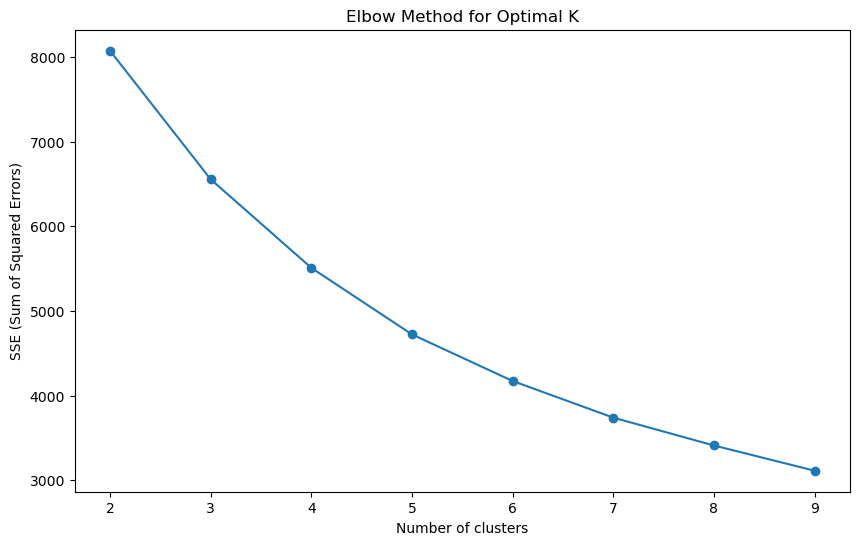

In [5]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method for Optimal K')
plt.show()

### 5 **Applying K-Means and Analyzing Clusters**

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


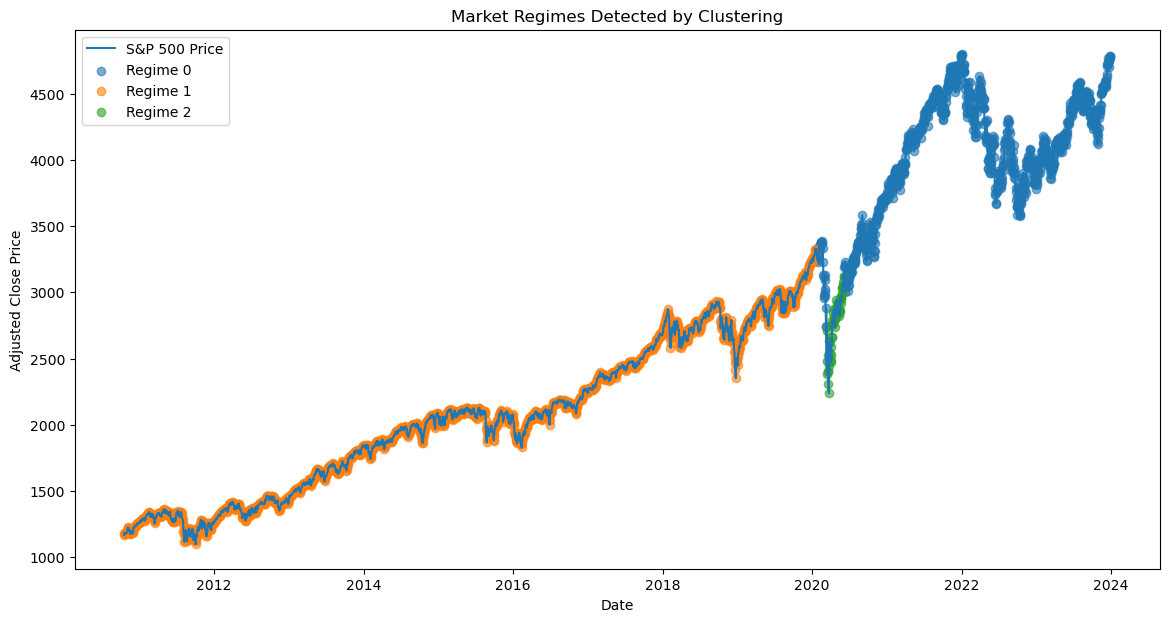

In [7]:
# Choosing the optimal K (e.g., based on the elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
stock_data['Regime'] = kmeans.fit_predict(features_scaled)

# Visualizing the regimes
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Adj Close'], label='S&P 500 Price')
for i in range(optimal_k):
    plt.scatter(stock_data[stock_data['Regime'] == i].index, 
                stock_data[stock_data['Regime'] == i]['Adj Close'], label=f'Regime {i}', alpha=0.6)

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Market Regimes Detected by Clustering')
plt.legend()
plt.show()

### 6. **Analyzing and Labeling Clusters**
- **Average Metrics**: For each cluster, the average returns and volatility are calculated to understand the characteristics of each regime.
- **Manual Labeling**: Based on the analysis, regimes are labeled manually (e.g., high return and low volatility might indicate a Bull Market, while high volatility and low returns could indicate a Bear Market).


In [8]:
# Calculate average returns and volatility for each regime
for i in range(optimal_k):
    regime_data = stock_data[stock_data['Regime'] == i]
    avg_return = regime_data['Return'].mean()
    avg_volatility = regime_data['Volatility'].mean()
    print(f'Regime {i}: Avg Return = {avg_return:.4f}, Avg Volatility = {avg_volatility:.4f}')

# Manually label the regimes based on characteristics (e.g., high return, low volatility = Bull Market)
regime_labels = {0: 'Bull', 1: 'Bear', 2: 'Neutral'}  # Example labels; adjust based on analysis
stock_data['Regime_Label'] = stock_data['Regime'].map(regime_labels)

Regime 0: Avg Return = 0.0002, Avg Volatility = 0.0109
Regime 1: Avg Return = 0.0005, Avg Volatility = 0.0083
Regime 2: Avg Return = 0.0046, Avg Volatility = 0.0389


### 7. **Model Validation**
- **Cumulative Returns**: The cumulative returns of each regime are calculated and plotted to validate the accuracy and behavior of the detected regimes over time.
- **Backtesting**: By examining the performance of each regime, the reliability of the clustering model can be assessed.



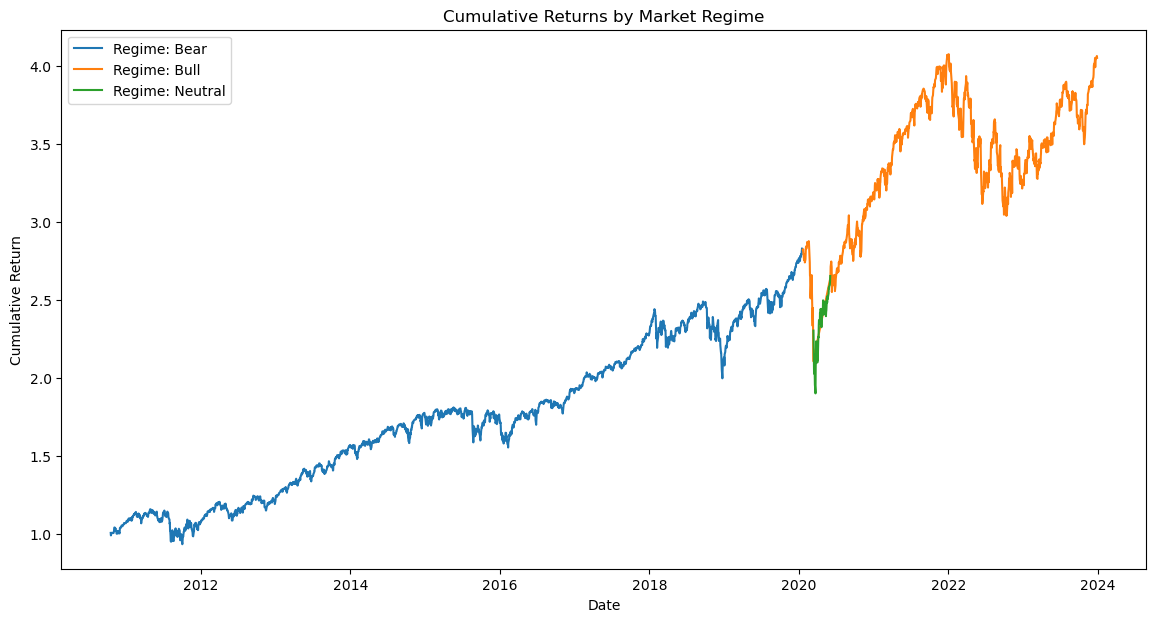

In [9]:
# Calculate cumulative returns for each regime
stock_data['Cumulative_Return'] = (1 + stock_data['Return']).cumprod()

# Plot cumulative returns per regime
plt.figure(figsize=(14, 7))
for label in stock_data['Regime_Label'].unique():
    regime_returns = stock_data[stock_data['Regime_Label'] == label]['Cumulative_Return']
    plt.plot(regime_returns, label=f'Regime: {label}')

plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns by Market Regime')
plt.legend()
plt.show()

### 8. **Predicting Market Regimes**
To extend the project, a supervised learning model (e.g., Logistic Regression) can be implemented to predict future market regimes based on current market features:
- **Model Training**: The Logistic Regression model is trained using historical features and the identified regimes.
- **Evaluation**: Model performance is evaluated using metrics like precision, recall, and F1-score, helping to assess its effectiveness in predicting future market behavior.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare the dataset for supervised learning
X = features_scaled
y = stock_data['Regime']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       701
           2       1.00      0.95      0.97        20

    accuracy                           1.00       997
   macro avg       1.00      0.98      0.99       997
weighted avg       1.00      1.00      1.00       997



## Conclusion
This project implements a basic Market Trend Classification Model using clustering techniques and evaluates it with historical stock data. The approach can be expanded by using different clustering algorithms, incorporating additional market features, or even integrating reinforcement learning for predictive trading strategies based on identified regimes.